In [18]:

# Install kaggle and dotenv libraries if needed
# !pip install kaggle
# !pip install dotenv

# Libraries for loading kaggle data and token anonimity in Github
import os
from kaggle.api.kaggle_api_extended import KaggleApi
from dotenv import load_dotenv

# Libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [12]:
# Load .env file to import personal Kaggle username and API key
load_dotenv()

# Set Kaggle credentials .env file
# Note that Kaggle credentials are obtained from your kaggle.json file
os.environ['KAGGLE_USERNAME'] = os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = os.getenv('KAGGLE_KEY')

# Authenticate with Kaggle API
api = KaggleApi()
api.authenticate()

# Download and unzip dataset
api.dataset_download_files('ziya07/ev-battery-charging-data', path='./', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/ziya07/ev-battery-charging-data


In [13]:
df = pd.read_csv('ev_battery_charging_data.csv')
print(f'Downloaded CSV Data:')
df.head(20)

Downloaded CSV Data:


,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,112,Model B,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,398,Model A,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,175,Model A,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,150,Model B,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,886,Model C,2
5,24.039507,3.961148,78.345844,36.656608,20.363487,28.813443,5.435926,Slow,98.912815,Li-ion,248,Model C,0
6,15.227525,3.984594,50.476586,38.121741,22.221495,97.679844,10.807450,Fast,97.838510,LiFePO4,830,Model B,2
7,87.955853,4.094437,79.903950,20.243135,23.169112,104.754763,14.139513,Fast,97.172097,LiFePO4,221,Model A,2
8,64.100351,3.674768,15.882954,33.480398,28.593944,38.181765,8.060851,Slow,98.387830,Li-ion,310,Model B,0
9,73.726532,3.842597,53.881407,21.036716,16.133609,63.034653,9.991050,Slow,98.001790,Li-ion,379,Model C,1


In [15]:
# categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [16]:
# Check mappings of encoded categorical values
for col, encoder in label_encoders.items():
    print(f"Mapping for '{col}':")
    for original, encoded in zip(encoder.classes_, encoder.transform(encoder.classes_)):
        print(f"  {original} -> {encoded}")

Mapping for 'Charging Mode':
  Fast -> 0
  Normal -> 1
  Slow -> 2
Mapping for 'Battery Type':
  Li-ion -> 0
  LiFePO4 -> 1
Mapping for 'EV Model':
  Model A -> 0
  Model B -> 1
  Model C -> 2


array([[<Axes: title={'center': 'SOC (%)'}>,
        <Axes: title={'center': 'Voltage (V)'}>,
        <Axes: title={'center': 'Current (A)'}>,
        <Axes: title={'center': 'Battery Temp (°C)'}>],
       [<Axes: title={'center': 'Ambient Temp (°C)'}>,
        <Axes: title={'center': 'Charging Duration (min)'}>,
        <Axes: title={'center': 'Degradation Rate (%)'}>,
        <Axes: title={'center': 'Charging Mode'}>],
       [<Axes: title={'center': 'Efficiency (%)'}>,
        <Axes: title={'center': 'Battery Type'}>,
        <Axes: title={'center': 'Charging Cycles'}>,
        <Axes: title={'center': 'EV Model'}>],
       [<Axes: title={'center': 'Optimal Charging Duration Class'}>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

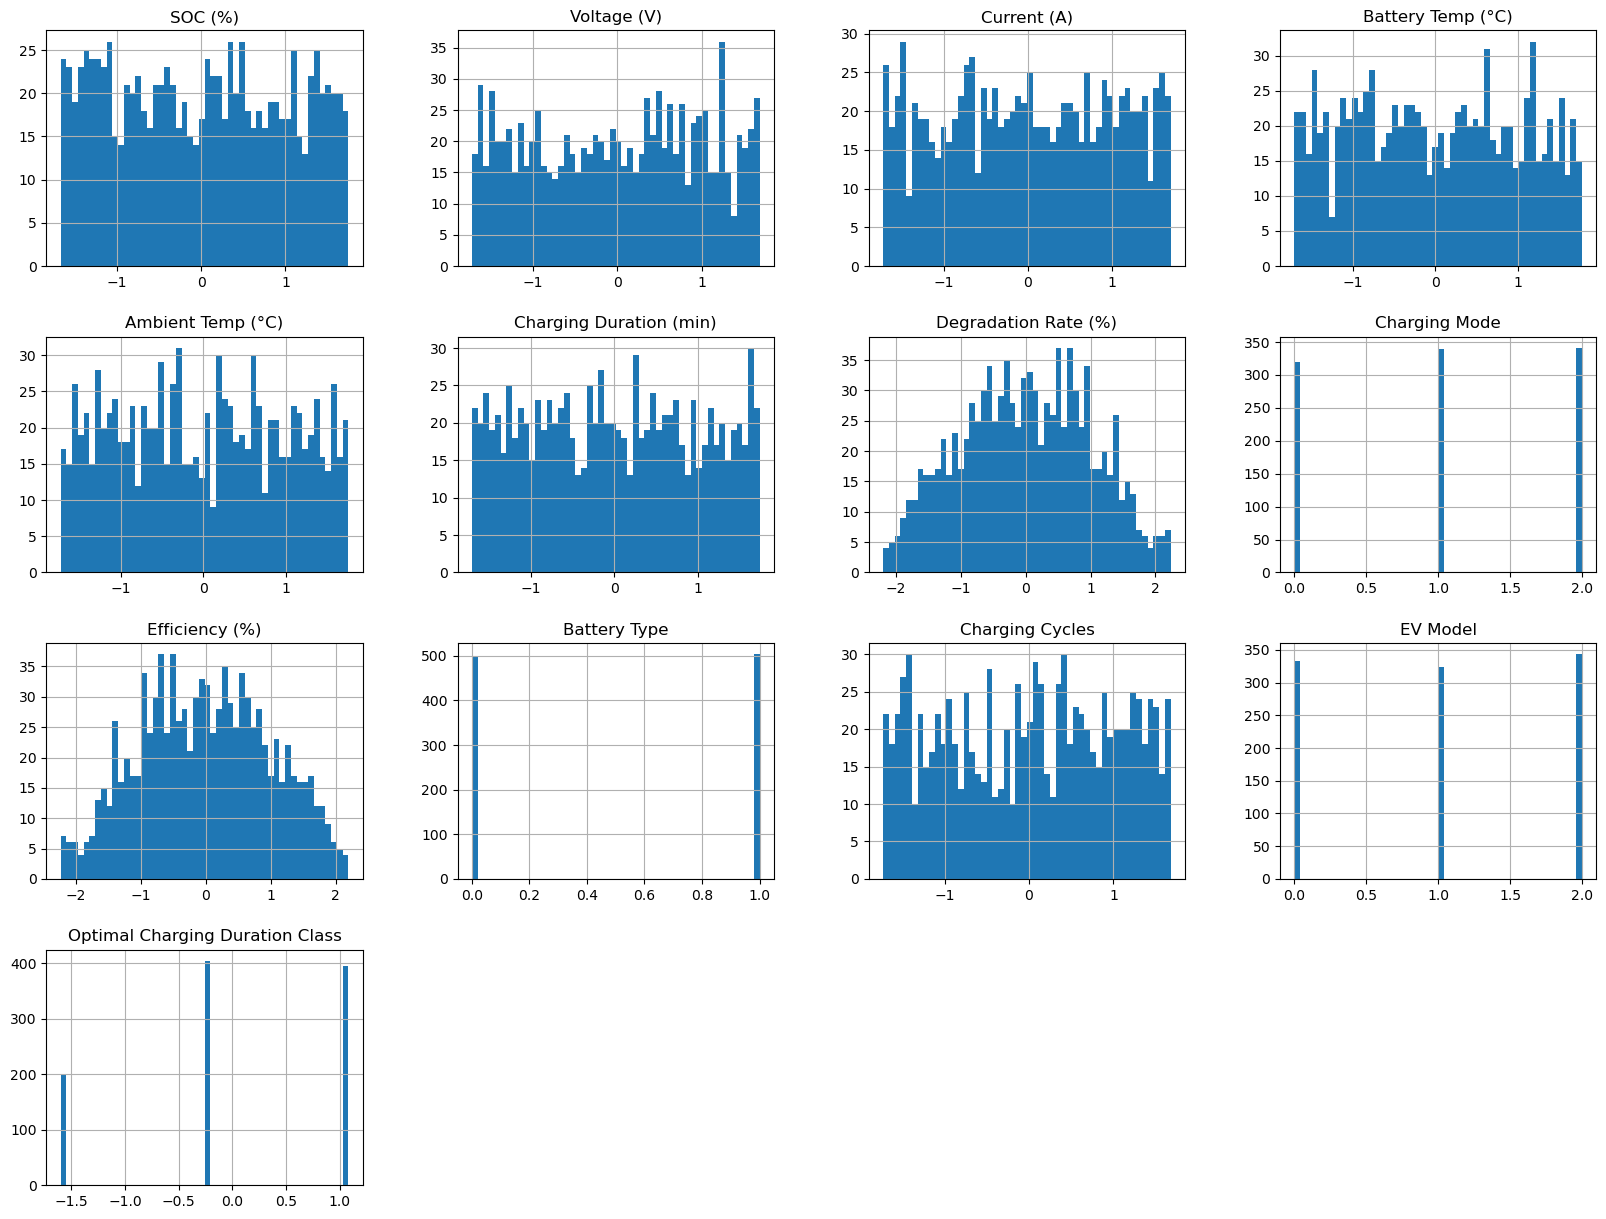

In [17]:
df.hist(bins=50, figsize=(20, 15))

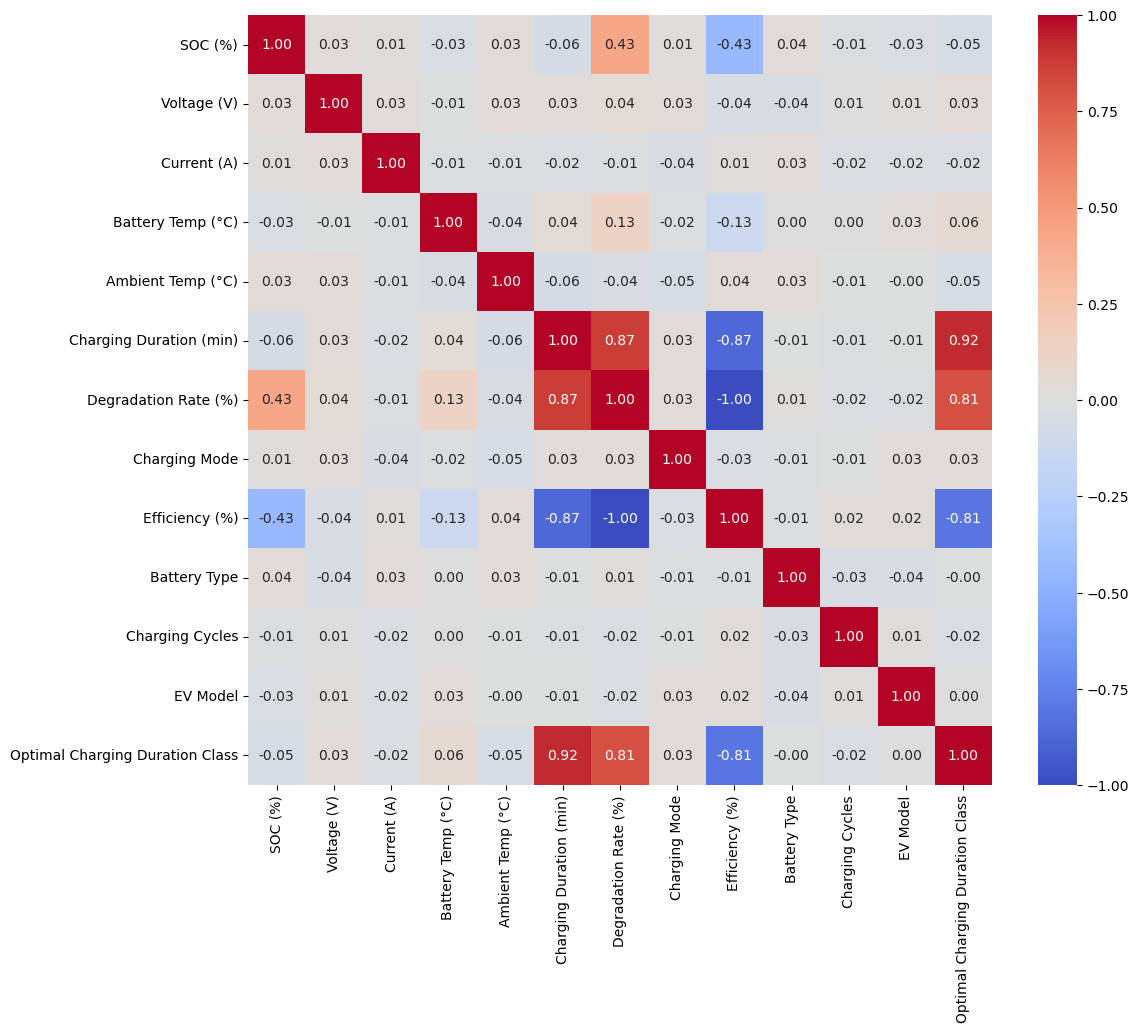

In [19]:
## Identify highly correlated features
## Assess relationships between features and target variable

corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [20]:
## Extract highly correlated features
threshold = 0.8
high_corr = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1.0)

high_corr_pairs = []
for col in high_corr.columns:
    correlated_features = high_corr.index[high_corr[col]].tolist()
    for feature in correlated_features:
        pair = tuple(sorted((col, feature)))
        if pair not in high_corr_pairs:
            high_corr_pairs.append(pair)

# print("Highly Correlated Pairs:", high_corr_pairs)
high_corr_features = list(set([feature for pair in high_corr_pairs for feature in pair]))
high_corr_features

['Charging Duration (min)',
 'Degradation Rate (%)',
 'Efficiency (%)',
 'Optimal Charging Duration Class']

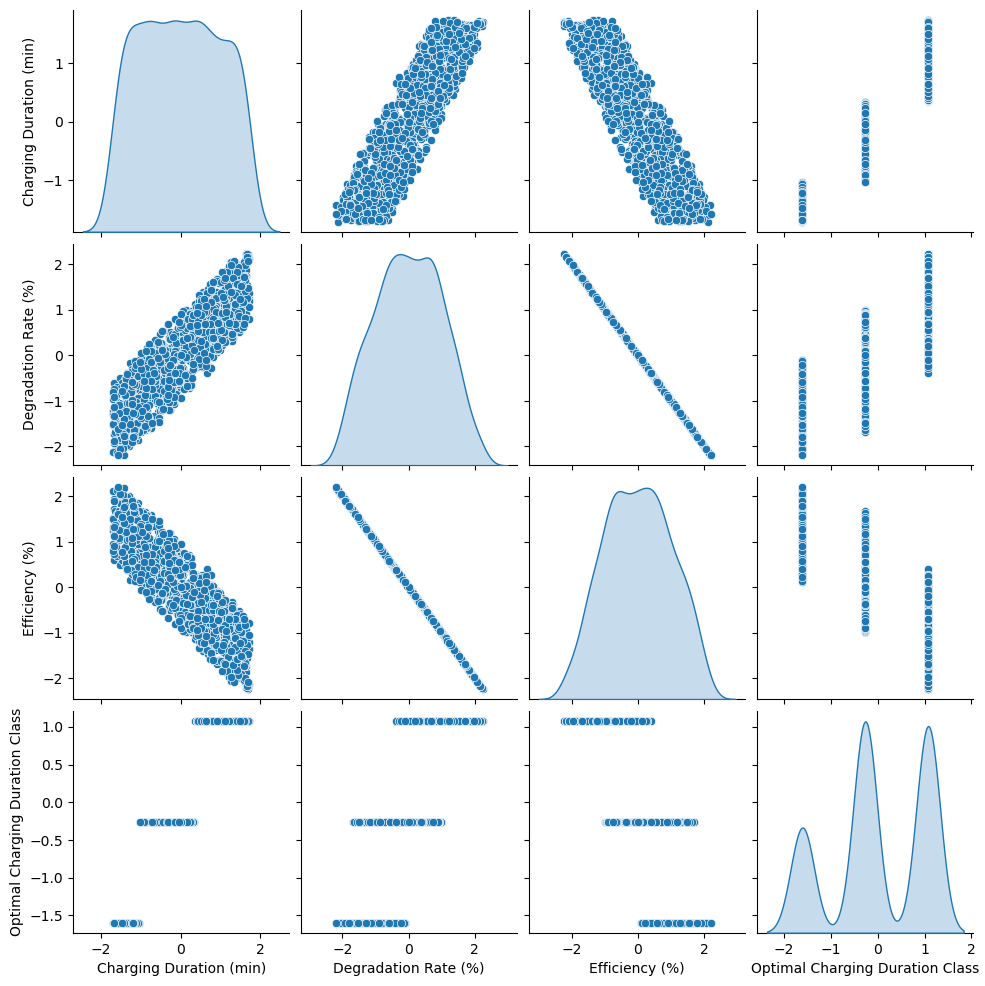

In [21]:
## Plot paiplot for the high corr features
sns.pairplot(df[high_corr_features], diag_kind='kde')
plt.show()